In [48]:
from cw_analysis import calculate_ppc, process_multiple_ppc, make_array, normal_distribution_tests, find_best_mean, find_best_median, top_n_medians

import matplotlib.pyplot as plt
import numpy as np
import csv
import math
import random

import pandas as pd

from matplotlib import style
from matplotlib.pyplot import cm
import matplotlib.collections as mcoll

import seaborn as sns
from scipy.stats import kurtosis, skew
from scipy import stats
import statistics

In [61]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# F = 0.8, changing K

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

<Figure size 1080x864 with 0 Axes>

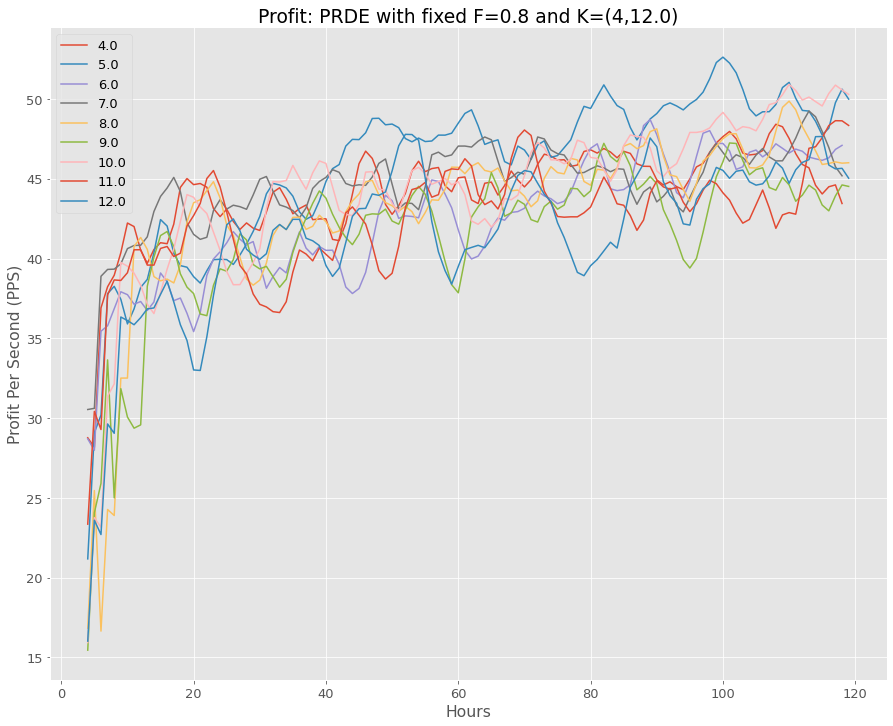

In [62]:
all_sma_set_f_5d = process_multiple_ppc('unit_elastic/set_f0.8_5d/set_f_%d_trail',4,13,1,
                                        'unit_elastic/set_f0.8_5d/figures/set_f0.8_5d.png', 
                                        'Profit: PRDE with fixed F=0.8 and K=')

In [81]:
all_sma_set_f_5d = make_array(all_sma_set_f_5d)

In [52]:
# normal_distribution_tests(all_sma_set_f_5d, False)

C:\Users\linda\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Total (B+S) Profit Per Second')

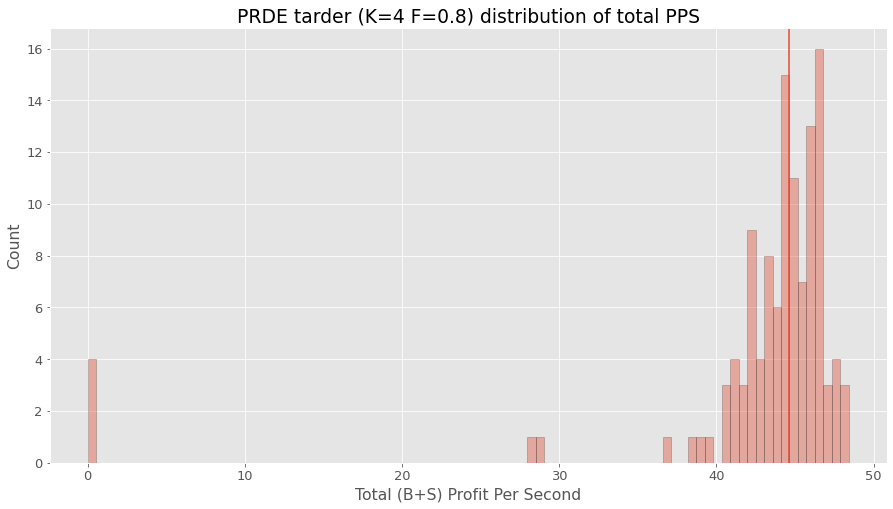

In [112]:
sns.distplot(all_sma_set_f_5d[0:1], hist=True, kde=False, bins=int(180/2), hist_kws={'edgecolor':'black'})
plt.axvline(x=statistics.median(all_sma_set_f_5d[0]) )

plt.title("PRDE tarder (K=4 F=0.8) distribution of total PPS")
plt.ylabel("Count")
plt.xlabel("Total (B+S) Profit Per Second")

In [53]:
find_best_mean(all_sma_set_f_5d, 4)

# fig = plt.figure(figsize =(10, 7))
# plt.boxplot(all_sma_set_f_5d)
# plt.show()

[42.69967226890758, 44.26719678333335, 40.97525004537814, 43.07000373613445, 41.670977055, 40.020067736666654, 42.703186661666656, 41.00063520166669, 40.07589549833334]
5 44.26719678333335


In [107]:
# medians_5d = find_best_median(all_sma_set_f_5d, 4)

In [85]:
top_n_medians(medians_5d, 3)

1 47.43202160000001
3 44.967672199999996
6 44.952246199999976


[[1, 47.43202160000001], [3, 44.967672199999996], [6, 44.952246199999976]]

In [82]:
k, p = stats.kruskal(all_sma_set_f_5d[0], all_sma_set_f_5d[1], all_sma_set_f_5d[2], all_sma_set_f_5d[3], all_sma_set_f_5d[4] , all_sma_set_f_5d[5],  all_sma_set_f_5d[6], all_sma_set_f_5d[7], all_sma_set_f_5d[8])
# print(p)
print(format(p))

1.0998072939747266e-25


In [86]:
import scikit_posthocs as sp
data = [all_sma_set_f_5d[1], all_sma_set_f_5d[3], all_sma_set_f_5d[6]]
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.000063,0.001319
2,0.000063,1.000000,1.000000
3,0.001319,1.000000,1.000000


# K = [5, 7, 10], changing F

## K = 7

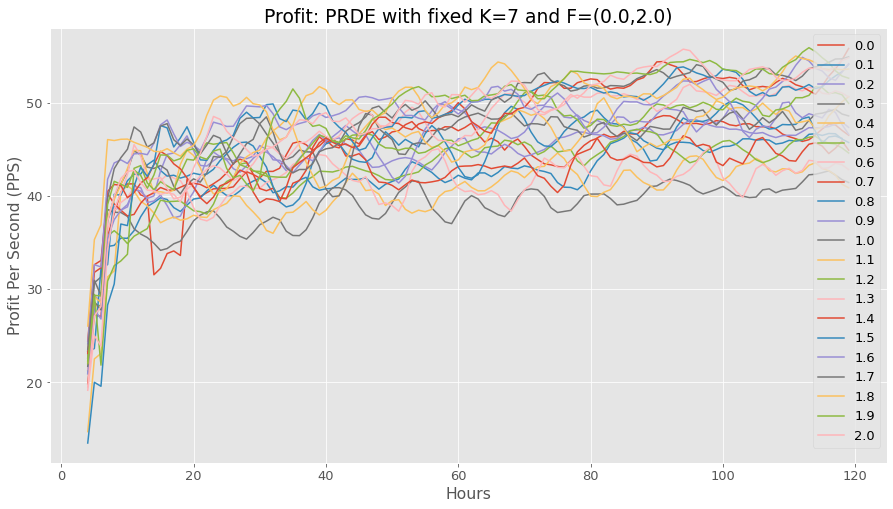

In [99]:
u_sma_set_k7_5d = process_multiple_ppc('unit_elastic/set_kbest_5d/set_k7_%01.1f_trail',0.0,2.1,0.1,
                                      'unit_elastic/set_kbest_5d/figures/set_k7.png', 
                                      'Profit: PRDE with fixed K=7 and F=')

In [100]:
u_sma_set_k7_5d = make_array(u_sma_set_k7_5d)

### Distribution Analysis 

In [5]:
# normal_distribution_tests(all_sma_set_k7_5d, False)

### Mean Analysis 


[42.782901304999996, 40.73724488666665, 42.83649064333331, 37.46706764500001, 38.73284827833333, 41.273431305000024, 39.99475681166667, 41.251849335, 43.319635425210095, 44.14593265, 44.21952690000001, 43.936601486666675, 44.35638646499999, 45.41047138833333, 45.90319790499999, 46.62302094166669, 47.216021465, 47.297884204999974, 48.270342520000014, 47.53747922166667, 47.136654325]
18 48.270342520000014


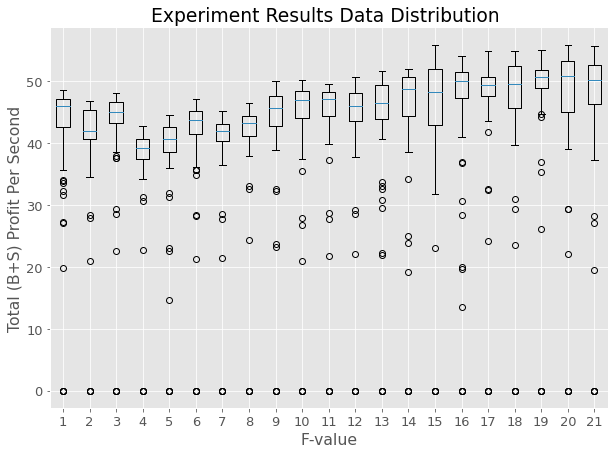

In [109]:
find_best_mean(u_sma_set_k7_5d, 0)

fig = plt.figure(figsize =(10, 7))
plt.boxplot(u_sma_set_k7_5d)
plt.title("Experiment Results Data Distribution ")
plt.ylabel("Total (B+S) Profit Per Second")
plt.xlabel("F-value")
plt.show()

In [106]:
# medians_k7 = find_best_median(u_sma_set_k7_5d, 0)
# find_best_median(u_sma_set_k7_5d, 0)

In [94]:
top_n_medians(medians_k7, 3)

19 50.76448719999999
18 50.65105250000002
20 50.0938527


[[19, 50.76448719999999], [18, 50.65105250000002], [20, 50.0938527]]

### ANOVA 

In [ ]:
# from scipy.stats import f_oneway
# f_oneway(all_sma_set_k7_5d[0], all_sma_set_k7_5d[1], all_sma_set_k7_5d[2], all_sma_set_k7_5d[3], all_sma_set_k7_5d[4] , all_sma_set_k7_5d[5],  all_sma_set_k7_5d[6], all_sma_set_k7_5d[7])

### Kruskal-Wallis 

In [14]:
k, p = stats.kruskal(all_sma_set_k7_5d[0], all_sma_set_k7_5d[1], all_sma_set_k7_5d[2], all_sma_set_k7_5d[3], all_sma_set_k7_5d[4] , all_sma_set_k7_5d[5],  
                     all_sma_set_k7_5d[6], all_sma_set_k7_5d[7], all_sma_set_k7_5d[8], all_sma_set_k7_5d[9], all_sma_set_k7_5d[10], all_sma_set_k7_5d[11],
                     all_sma_set_k7_5d[12], all_sma_set_k7_5d[13], all_sma_set_k7_5d[14], all_sma_set_k7_5d[15], all_sma_set_k7_5d[16], all_sma_set_k7_5d[17],
                     all_sma_set_k7_5d[18], all_sma_set_k7_5d[19])
print(p)
print(format(p, '.22f'))

3.9584957564557436e-197
0.0000000000000000000000


### Mann-whitney 

In [15]:
from scipy.stats import norm
from scipy.stats import mannwhitneyu

res, p = mannwhitneyu(all_sma_set_k7_5d[0], all_sma_set_k7_5d[1])
print(format(p, '.11f'))

0.00000000264


## Individual Trials 

In [12]:
# total = process_multiple_ppc('perfect_elastic/3d_set_f1.8_k5_trail',4,5,1,
#                                       'set_k/figures/total_all_f.png', 
#                                       'Profit: PRDE with fixed K=5 and F=1.8')

# calculate_ppc('perfect_elastic/3d_set_f1.8_k5_trail', 5, "title", True)
# np.mean(total[0])

# K = 5

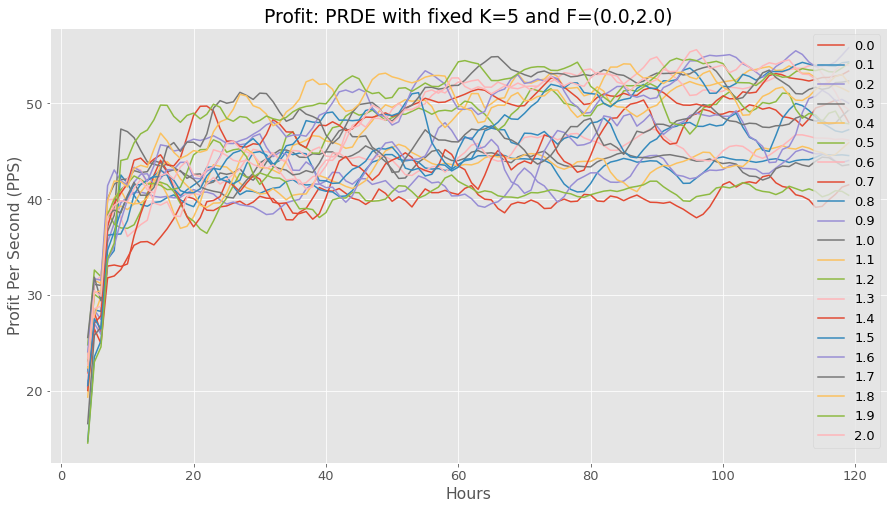

In [96]:
u_sma_set_k5_5d = process_multiple_ppc('unit_elastic/set_kbest_5d/set_k5_f%01.1f',0.0,2.1,0.1,
                                      'unit_elastic/set_kbest_5d/figures/set_k5.png', 
                                      'Profit: PRDE with fixed K=5 and F=')


In [12]:
u_sma_set_k5_5d = make_array(u_sma_set_k5_5d)

In [104]:
# medians_k5 = find_best_median(u_sma_set_k5_5d, 0)
# find_best_median(u_sma_set_k5_5d, 0)

In [14]:
top_n_medians(medians_k5, 3)

19 51.84044109999999
20 51.38020250000001
17 51.35071649999996


[[19, 51.84044109999999], [20, 51.38020250000001], [17, 51.35071649999996]]

(0            NaN
 1            NaN
 2            NaN
 3            NaN
 4      22.693417
          ...    
 115    51.855566
 116    52.302927
 117    53.470199
 118    54.095287
 119    53.943179
 Name: 0, Length: 120, dtype: float64,
 120)

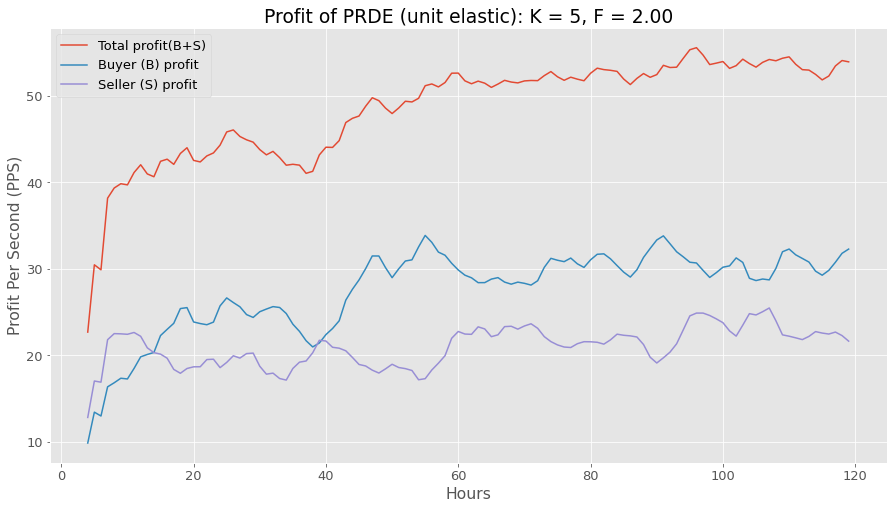

In [108]:
calculate_ppc('unit_elastic/set_kbest_5d/set_k5_f2.0', 0, "Profit of PRDE (unit elastic): K = 5, F = 2.0", "unit_elastic/set_kbest_5d/figures/set_k5_f2.0.png", True)

# K = 10

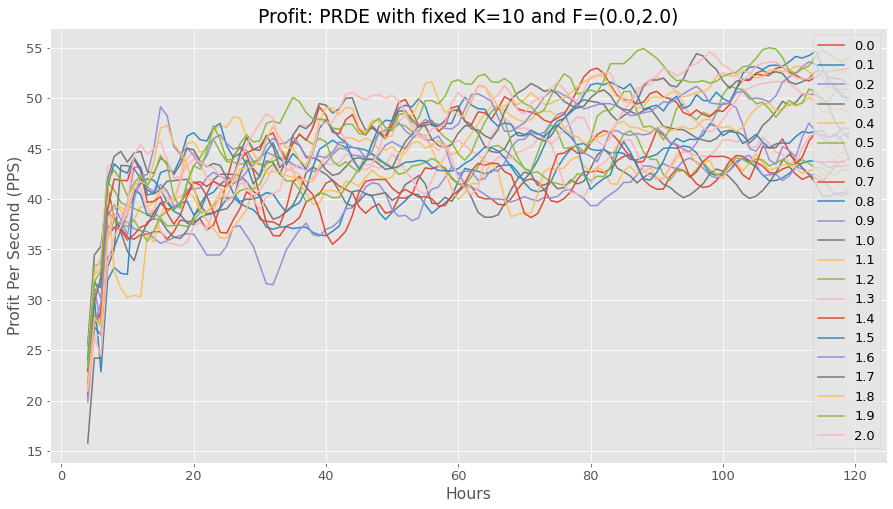

In [97]:
u_sma_set_k10_5d = process_multiple_ppc('unit_elastic/set_kbest_5d/set_k10_f%01.1f',0.0,2.1,0.1,
                                      'unit_elastic/set_kbest_5d/figures/set_k10.png', 
                                      'Profit: PRDE with fixed K=10 and F=')


In [98]:
u_sma_set_k10_5d = make_array(u_sma_set_k10_5d)

In [103]:
# medians_k10 = find_best_median(u_sma_set_k10_5d, 0)
# find_best_median(u_sma_set_k10_5d, 0)

In [35]:
top_n_medians(medians_k10, 3)

20 49.795769199999995
19 49.747286000000024
18 49.152710799999994


[[20, 49.795769199999995], [19, 49.747286000000024], [18, 49.152710799999994]]

In [101]:
k, p = stats.kruskal(u_sma_set_k5_5d[19], u_sma_set_k10_5d[20], u_sma_set_k7_5d[19])
p

nan

In [102]:
data = [u_sma_set_k5_5d[19], u_sma_set_k10_5d[20], u_sma_set_k7_5d[19]]
sp.posthoc_dunn(data, p_adjust = 'bonferroni')

,1,2,3
1,1.000000,0.000003,0.036817
2,0.000003,1.000000,0.049542
3,0.036817,0.049542,1.000000
